In [186]:
#Import libraries
import numpy as np
import scipy as sp
import pandas as pd

#Import graphing libraries and settings
import matplotlib.pyplot as plt
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D


import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 14)  #increase size of plots



#Set display options to display all data
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.max_rows', 1000000)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [187]:
#Import csv and fill Na values 
data = pd.read_csv('Amazon.csv')
print(data.shape)
data.Summary = data.Summary.fillna('0')
data.ProfileName = data.ProfileName.fillna(' ')

(455000, 13)


In [188]:
#Create columns stating number of reviews written pre user, and per product
data['UserCounts'] = data.groupby('UserId')['UserId'].transform('count')
data['ProductCounts'] = data.groupby('ProductId')['ProductId'].transform('count')
data['Time'] = pd.to_datetime(data['Time'],unit='s')

In [189]:
# #removing review outliears
# data = data[data.UserCounts <= 150]
# data = data[data.UserCounts >= 2]
# #removing product outliers
# data = data[data.ProductCounts <= 550]
# data.shape

In [190]:
check = data[data.ProductCounts >= 550]
check.head()

single = data[data.UserCounts ==1]
len(single.ProductId.value_counts())

45508

In [191]:
#########VVV Visualizing data shape to attempt identifying clusters #####VVV


In [192]:
# Create DF sorted by amount of reviews written per user
dataSortedUser = data.sort_values(by="UserCounts")
#weirdSortedUser = weirdData.sort_values(by="UserCounts")

In [193]:
# Create DF sorted by amount of reviews written per user
dataSortedProduct = data.sort_values(by="ProductCounts")
#weirdSortedProduct = weirdData.sort_values(by="ProductCounts")

In [194]:
#Create DF with both duplicate User and Products dropped
ddupeAll = data.drop_duplicates("UserId")
ddupeAll = ddupeAll.drop_duplicates("ProductId")

In [ ]:
ddupeAll.shape

In [195]:
ddupeAll_SortedUser = ddupeAll.sort_values(by="UserCounts")
ddupeAll_SortedProduct = ddupeAll.sort_values(by="ProductCounts")

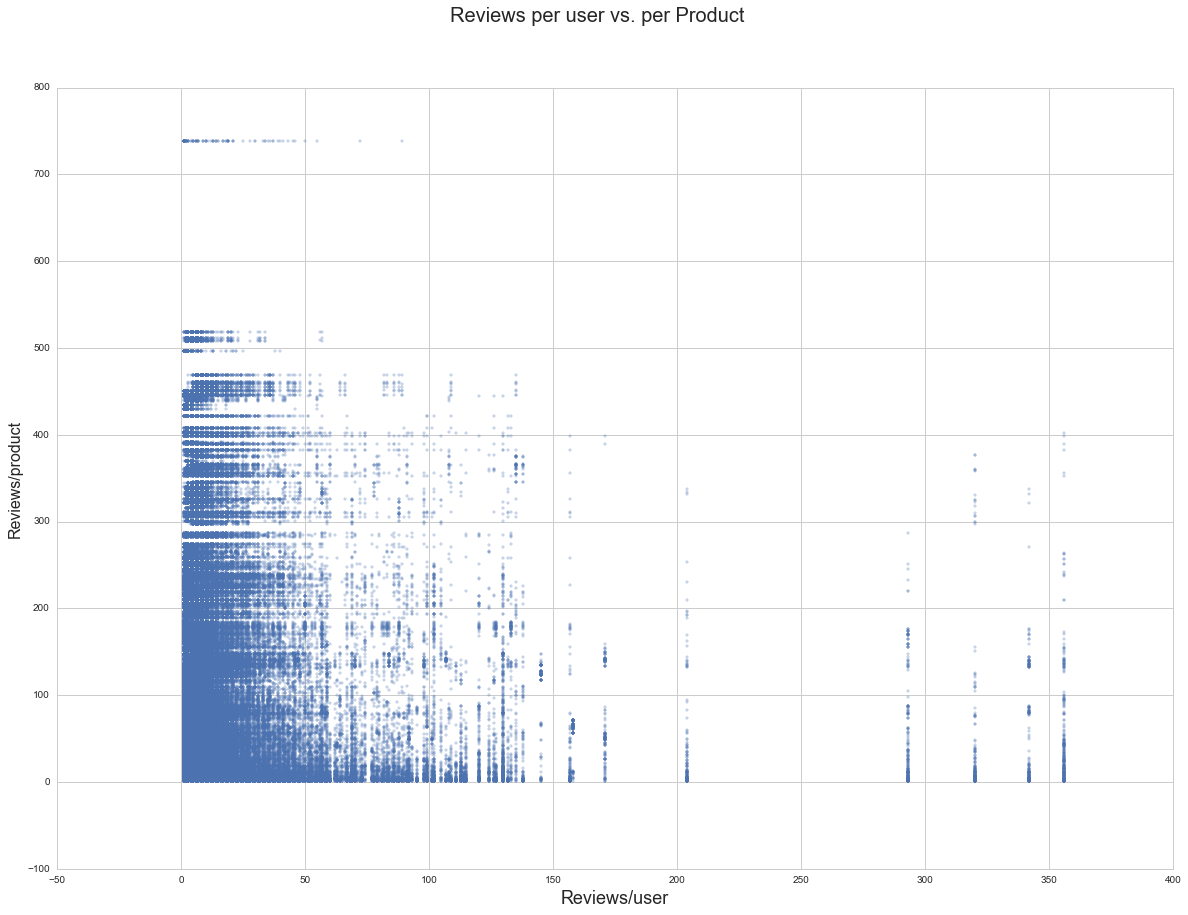

In [196]:
fig = plt.figure()
plt.scatter(data.UserCounts, data.ProductCounts, marker='+')
fig.suptitle('Reviews per user vs. per Product', fontsize=20)
plt.xlabel('Reviews/user: Vertical slices a dot at the horizontal slice location for each product they reviewed', fontsize=18)
plt.ylabel('Reviews/product: Horizontal slices a dot at the horizontal slice locaiton for each user that reviewed it', fontsize=16)

In [197]:
#Set Colors

light_rgba_colors = np.zeros((1,4))
light_rgba_colors[:,2] = 0.8
light_rgba_colors[:,1] = 0.3
light_rgba_colors[:,0] = 0.2
light_rgba_colors[:,3] = 0.1



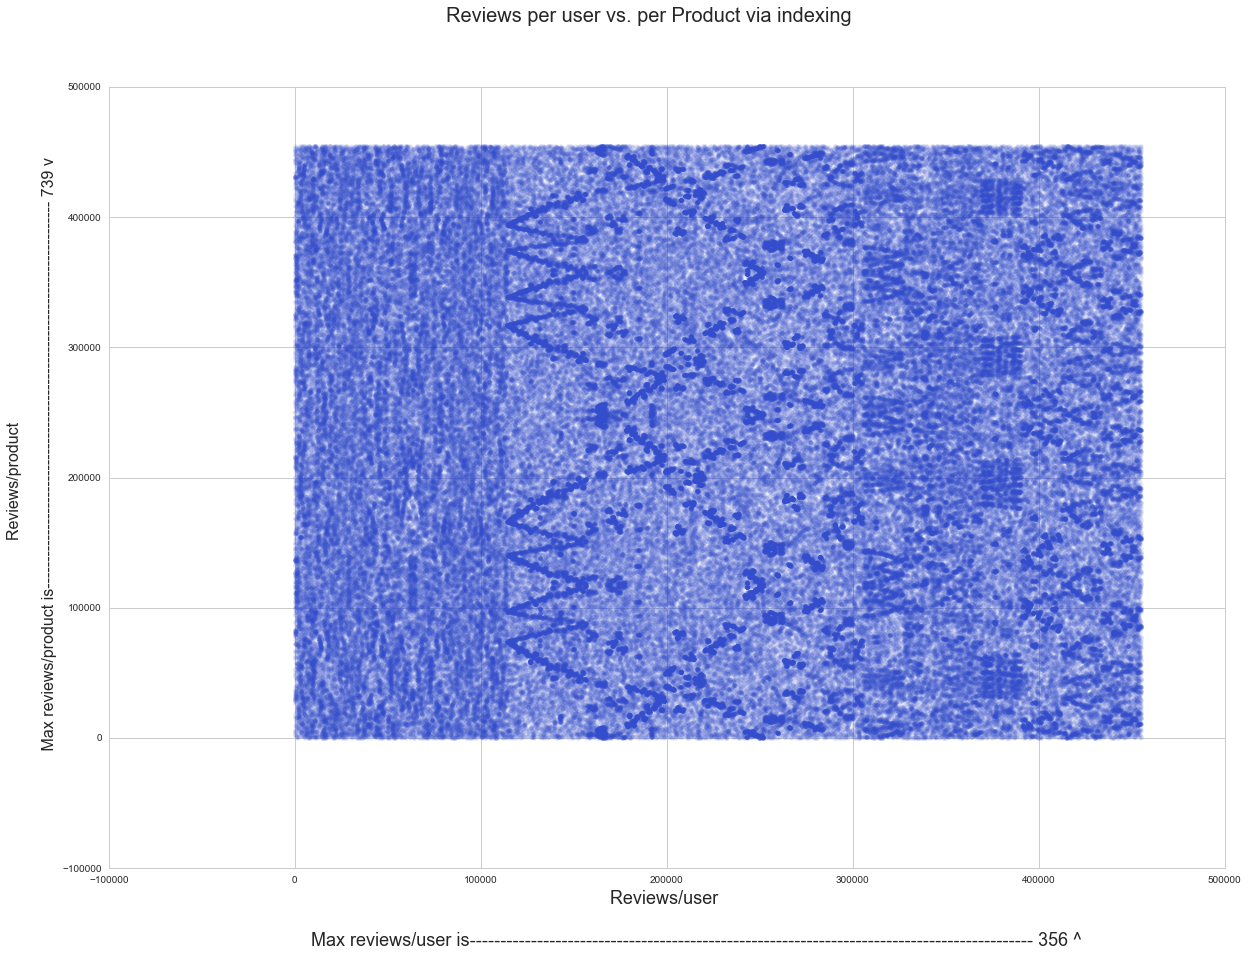

In [198]:
fig = plt.figure()

plt.scatter(dataSortedUser.index, dataSortedProduct.index,  marker='o', c=light_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing', fontsize=20)
plt.xlabel('Reviews/user: \n\n' + "            Max reviews/user is-------------------------------------------------------------------------------------------- %d ^ \n\n\n1.A duplicate dataframe was made.\n2. One set of data was sorted by the amount of reviews written for each product. From 1 review to 739 reviews.\n3.The other data frame was sorted by the amount of reviews written by each user. From 1 to 356.\n 4.The two data frames were plotted against each other BY INDEX value.\nSince both data-frames have the same amount of instances and they were both sorted from lowest to highest a matrix results with a boolean value (shown by a dot) for every single row by user and every single row by product.\nSince there are multiple instances of both the same ProductId and UserId this results in the tiling effect we see below.\n\nThis is controlled for in the following plot."%(data.UserCounts .max()), fontsize=18)
plt.ylabel('Reviews/product \n\n' + "           Max reviews/product is------------------------------------------------------------------------ %d v"%(data.ProductCounts.max()), fontsize=16)



In [199]:
#Trying with dduped data VVV
dark_rgba_colors = np.zeros((1,4))
dark_rgba_colors[:,2] = 0.5
dark_rgba_colors[:,1] = 0.3
dark_rgba_colors[:,0] = 0.2
dark_rgba_colors[:,3] = 0.25

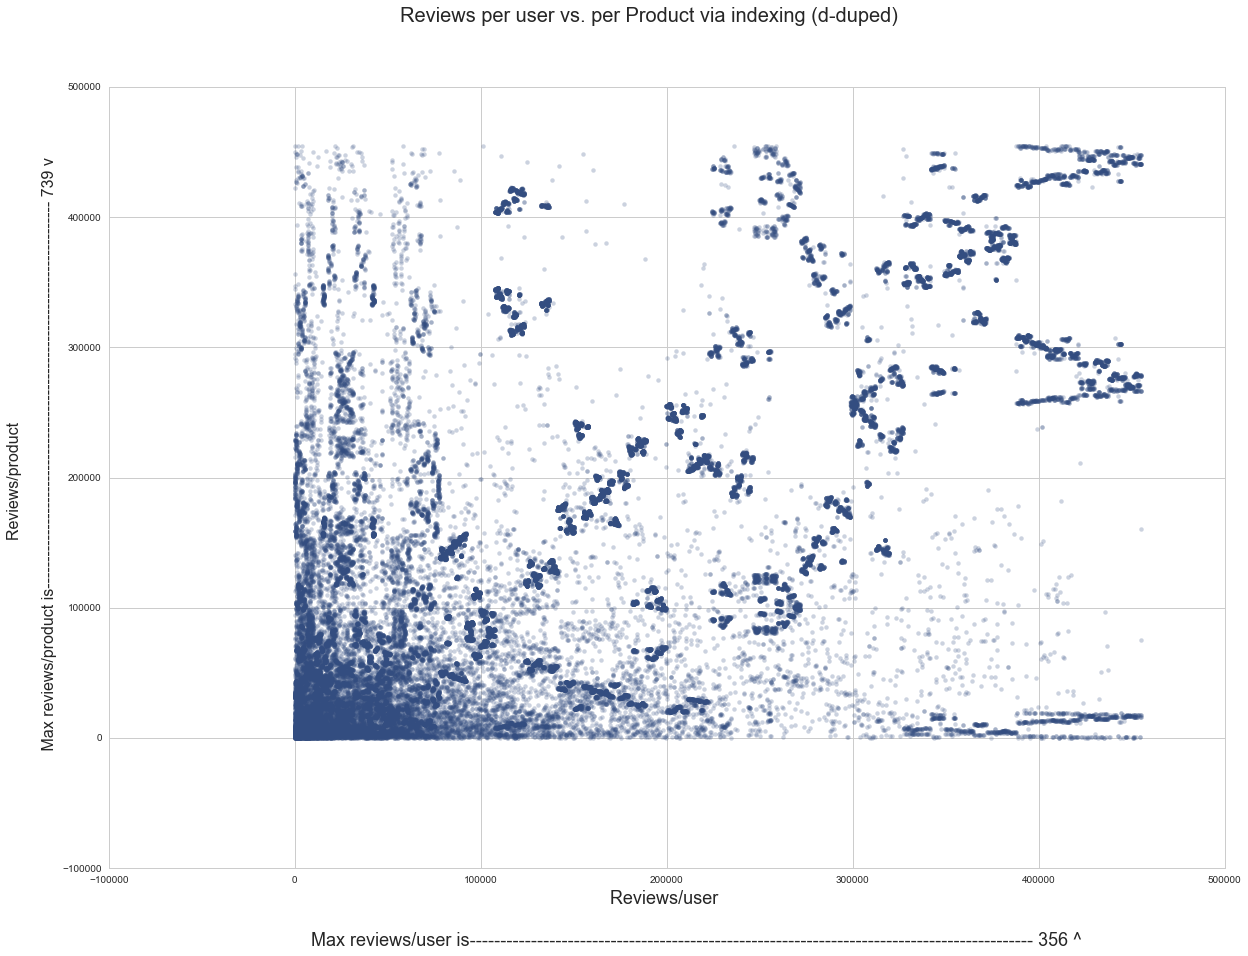

In [200]:
fig = plt.figure()

plt.scatter(ddupeAll_SortedUser.index, ddupeAll_SortedProduct.index, marker='o', c=dark_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing (d-duped)', fontsize=20)
plt.xlabel('Reviews/user \n\n' + "            Max reviews/user is-------------------------------------------------------------------------------------------- %d ^\n\n\n Precisely the same as above with duplicate instances of both ProductId and UserId removed."%(data.UserCounts.max()), fontsize=18)
plt.ylabel('Reviews/product \n\n' + "           Max reviews/product is------------------------------------------------------------------------ %d v"%(data.ProductCounts.max()), fontsize=16)

print()

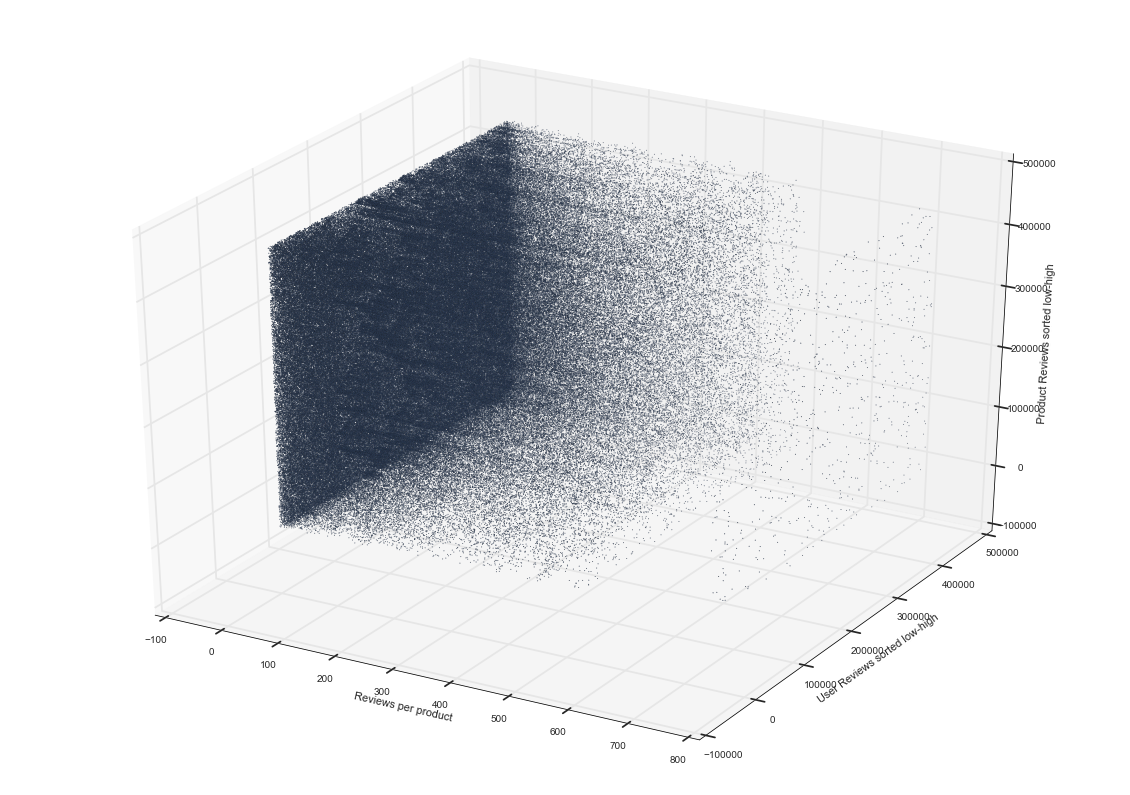

In [201]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( data.ProductCounts, dataSortedUser.index, dataSortedProduct.index,  s=0.5)# c=light_rgba_colors, marker='.', lw=0.05)
ax.set_xlabel('Reviews per product ')
ax.set_ylabel('User Reviews sorted low-high ')
ax.set_zlabel('Product Reviews sorted low-high')

plt.show()

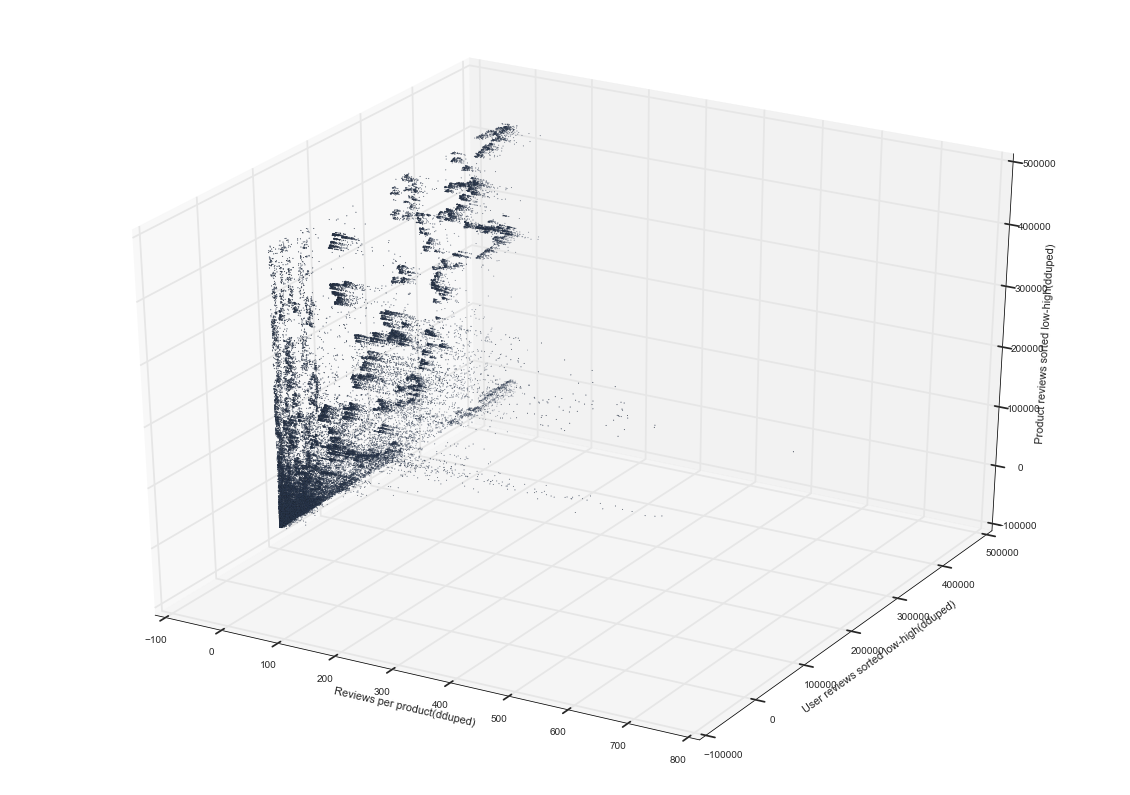

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( ddupeAll.ProductCounts, ddupeAll_SortedUser.index, ddupeAll_SortedProduct.index,  s=0.5)# c=dark_rgba_colors, marker='o', lw=0.1)
ax.set_xlabel('Reviews per product(dduped)')
ax.set_ylabel('User reviews sorted low-high(dduped)')
ax.set_zlabel('Product reviews sorted low-high(dduped)')

plt.show()

In [203]:
#Create DF with duplicate Products dropped, and sort.
ddupeProduct = data.drop_duplicates("ProductId")
ddupeProduct_SortUser = ddupeProduct.sort_values(by="UserCounts")
ddupeProduct_SortProduct = ddupeProduct.sort_values(by="ProductCounts")

In [204]:
#Create DF withduplicate Users dropped and sort.
ddupeUser = data.drop_duplicates("UserId")
ddupeUser_SortUser = ddupeUser.sort_values(by="UserCounts")
ddupeUser_SortProduct = ddupeUser.sort_values(by="ProductCounts")

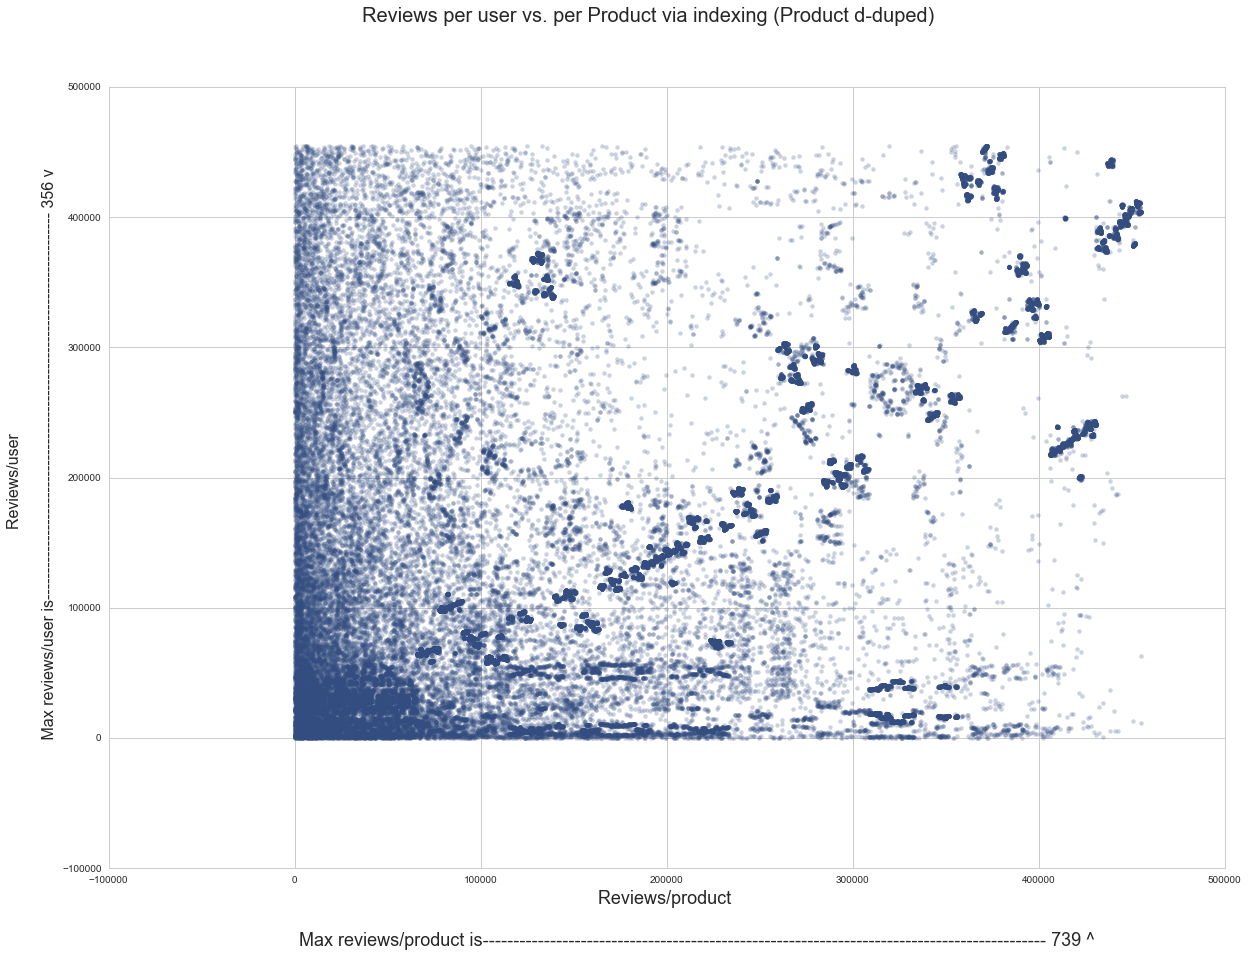

In [205]:
fig = plt.figure()

plt.scatter(ddupeProduct_SortProduct.index, ddupeProduct_SortUser.index, marker='o', c=dark_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing (Product d-duped)', fontsize=20)
plt.xlabel('Reviews/product \n\n' + "            Max reviews/product is-------------------------------------------------------------------------------------------- %d ^"%(data.ProductCounts .max()), fontsize=18)
plt.ylabel('Reviews/user \n\n' + "           Max reviews/user is------------------------------------------------------------------------ %d v"%(data.UserCounts.max()), fontsize=16)

print()

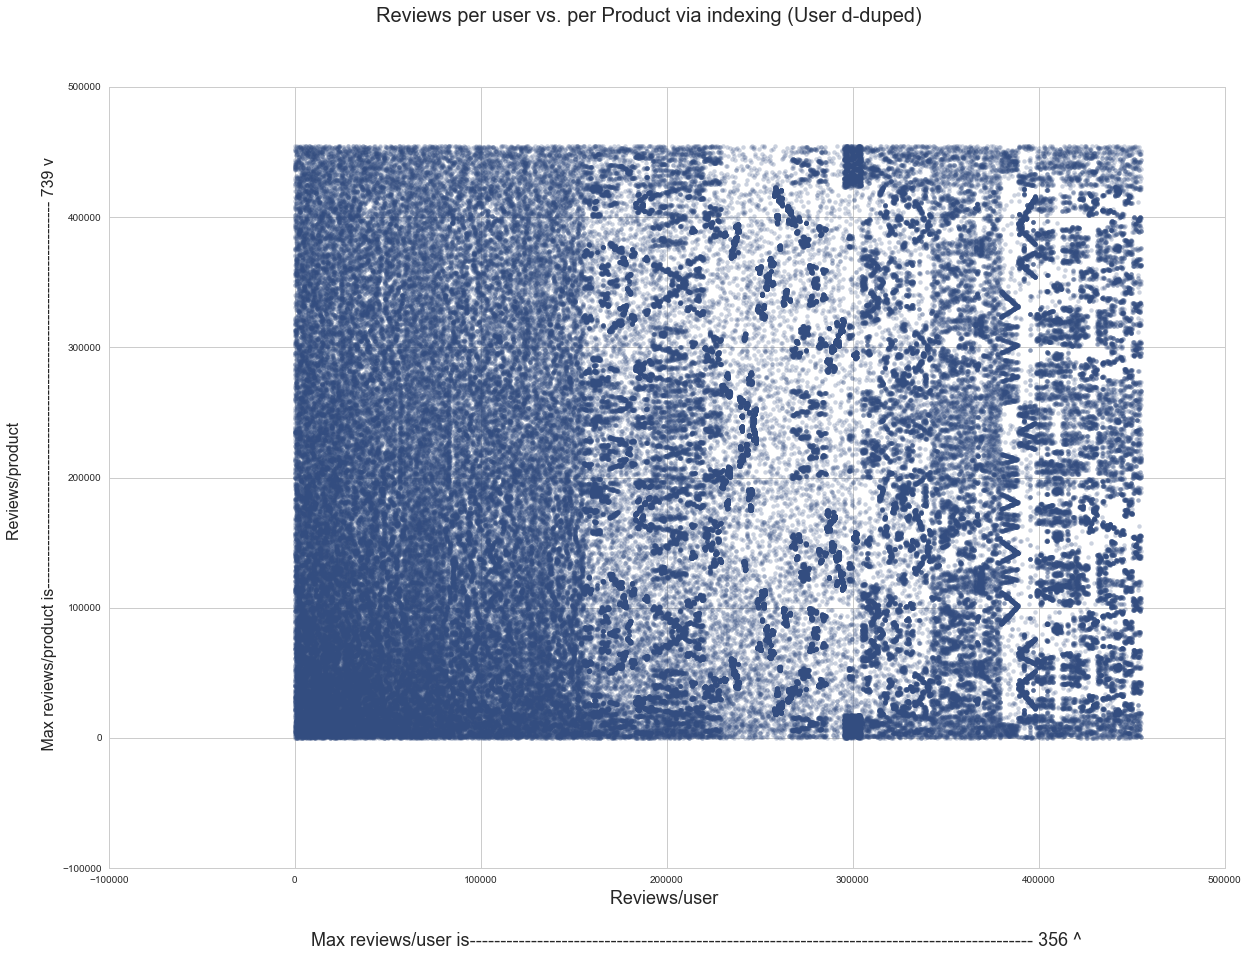

In [206]:
fig = plt.figure()

plt.scatter(ddupeUser_SortUser.index,  ddupeUser_SortProduct.index, marker='o', c=dark_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing (User d-duped)', fontsize=20)
plt.xlabel('Reviews/user \n\n' + "            Max reviews/user is-------------------------------------------------------------------------------------------- %d ^"%(data.UserCounts .max()), fontsize=18)
plt.ylabel('Reviews/product \n\n' + "           Max reviews/product is------------------------------------------------------------------------ %d v"%(data.ProductCounts.max()), fontsize=16)

print()

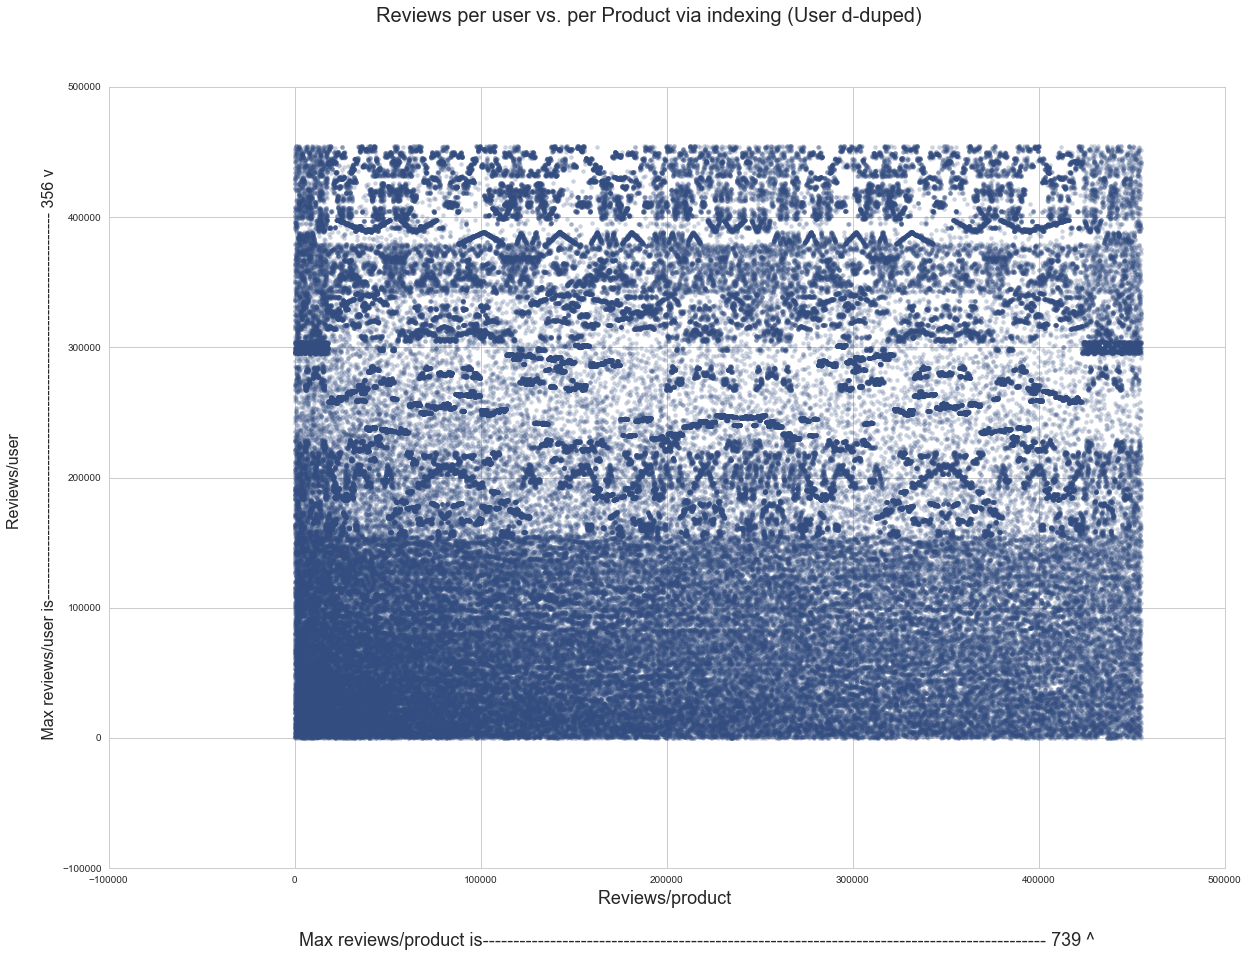

In [207]:
fig = plt.figure()

plt.scatter(ddupeUser_SortProduct.index, ddupeUser_SortUser.index,  marker='o', c=dark_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing (User d-duped)', fontsize=20)
plt.xlabel('Reviews/product \n\n' + "            Max reviews/product is-------------------------------------------------------------------------------------------- %d ^"%(data.ProductCounts .max()), fontsize=18)
plt.ylabel('Reviews/user \n\n' + "           Max reviews/user is------------------------------------------------------------------------ %d v"%(data.UserCounts.max()), fontsize=16)

print()

In [208]:
###Reviewing behavior of duplicates in the data
#Isolate super reviewers
checker = ddupeProduct[ddupeProduct.UserCounts >=150]
print(checker.UserCounts.value_counts())

#Isolate user for review activity
checker2 = data[data.UserCounts == 342]
print(pd.unique((checker2.ProductId.value_counts())))
#Find products with 4 reviews by super reviewer O.Brown
#print(checker2.ProductId.value_counts())

#Isolate product with 4 reviews by the same user
checker3 = checker2[checker2.ProductId == "B000CQC04Q"]
checker3

#Conclusion:
##### 4 different flavors of tea; Same Product ID!



342    125
320    124
293     79
204     62
356     53
157     44
171     12
158      6
Name: UserCounts, dtype: int64
[4 3 2 1]


Unnamed: 0      Id   ProductId          UserId  \
47783       203500  203501  B000CQC04Q  A1YUL9PCJR3JTY   
90161       203479  203480  B000CQC04Q  A1YUL9PCJR3JTY   
103720      203535  203536  B000CQC04Q  A1YUL9PCJR3JTY   
292588      203484  203485  B000CQC04Q  A1YUL9PCJR3JTY   

                            ProfileName  HelpfulnessNumerator  \
47783   O. Brown "Ms. O. Khannah-Brown"                     2   
90161   O. Brown "Ms. O. Khannah-Brown"                     6   
103720  O. Brown "Ms. O. Khannah-Brown"                     3   
292588  O. Brown "Ms. O. Khannah-Brown"                     4   

        HelpfulnessDenominator  Score       Time  \
47783                        2      5 2010-08-17   
90161                        6      3 2007-10-15   
103720                       4      4 2010-08-16   
292588                       4      4 2010-08-16   

                               Summary  \
47783             Sweet and Lovely Tea   
90161    Basic Lemon Ginger Herbal Tea   
103720  Hibiscus and Raspberry Delight   
292588      Subtle, Mild Chamomile Tea   

                                                                                                       Text  \
47783   *****<br />Stash's Licorice Spice Caffeine Free Herbal Tea has a the sweet flavor licorice teas ...   
90161   ***<br />Stash's Lemon Ginger Caffeine Free Herbal Tea is a basic lemon ginger tea, tasting stro...   
103720  ****<br />Stash's Wild Raspberry Caffeine Free Herbal Tea is strong and fruity, great if you lov...   
292588  ****<br />Stash's Chamomile Caffeine Free Herbal Tea is one of their totally natural teas, conta...   

        helpScore helpful  UserCounts  ProductCounts  
47783        1.00   False         342            144  
90161        1.00    True         342            144  
103720       0.75   False         342            144  
292588       1.00    True         342            144

In [209]:
#%matplotlib notebook

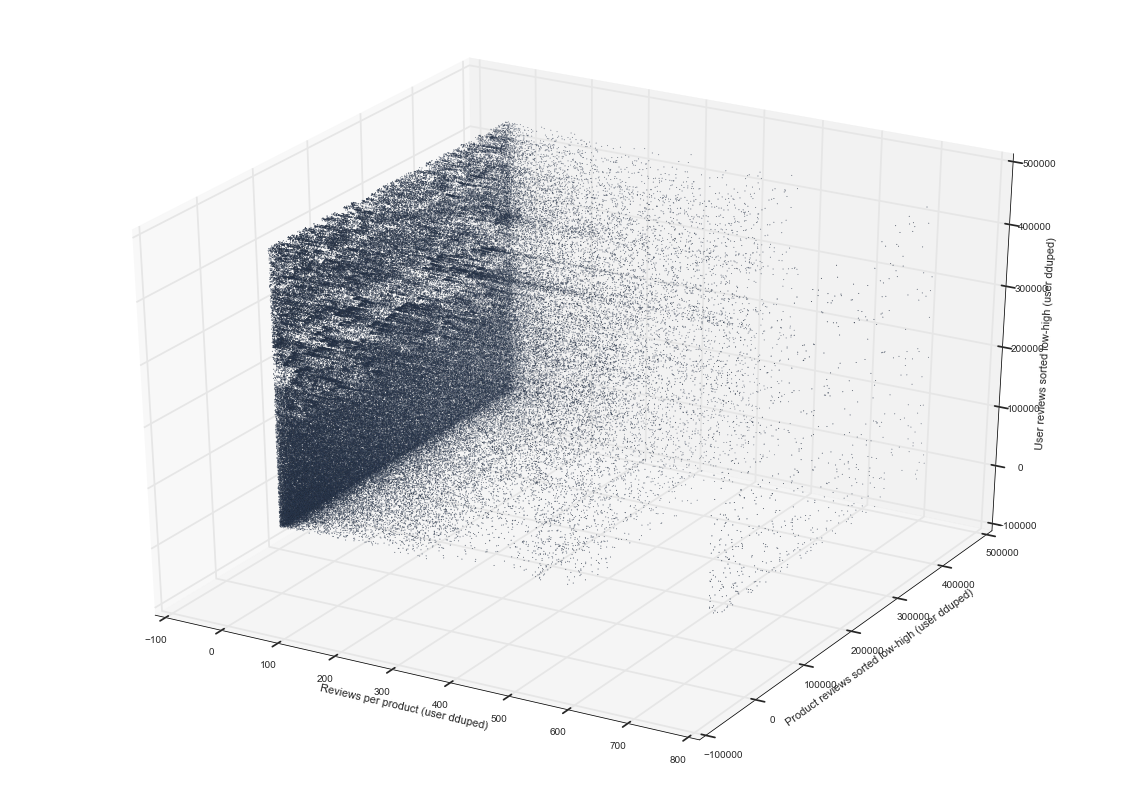

In [210]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( ddupeUser.ProductCounts, ddupeUser_SortProduct.index, ddupeUser_SortUser.index, s=0.5)# c=dark_rgba_colors, marker='o', lw=0.1)
ax.set_xlabel('Reviews per product (user dduped)')
ax.set_ylabel('Product reviews sorted low-high (user dduped)')
ax.set_zlabel('User reviews sorted low-high (user dduped)')

plt.show()


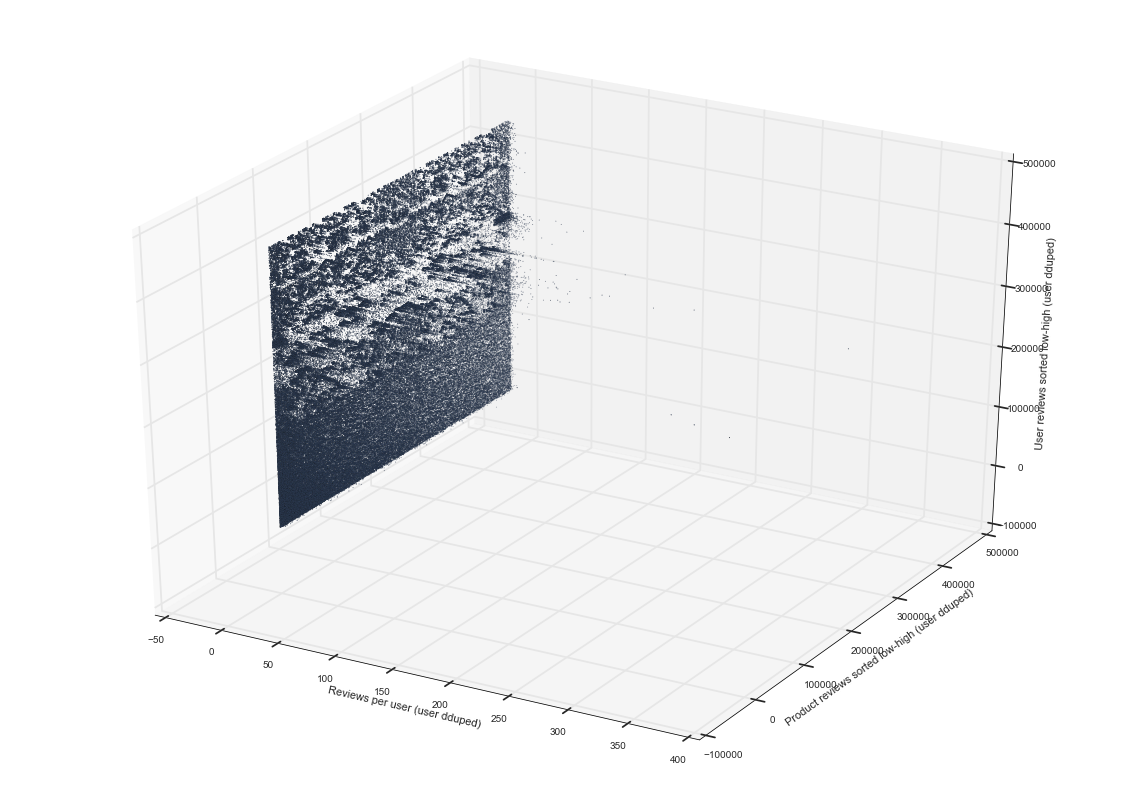

In [211]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( ddupeUser.UserCounts, ddupeUser_SortProduct.index, ddupeUser_SortUser.index, s=0.5)# c=dark_rgba_colors, marker='o', lw=0.1)
ax.set_xlabel('Reviews per user (user dduped)')
ax.set_ylabel('Product reviews sorted low-high (user dduped)')
ax.set_zlabel('User reviews sorted low-high (user dduped)')

plt.show()
